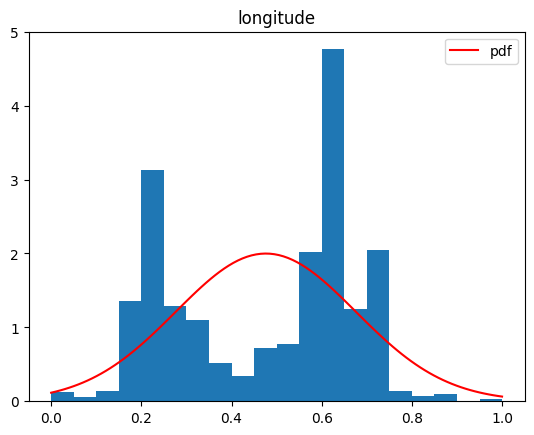

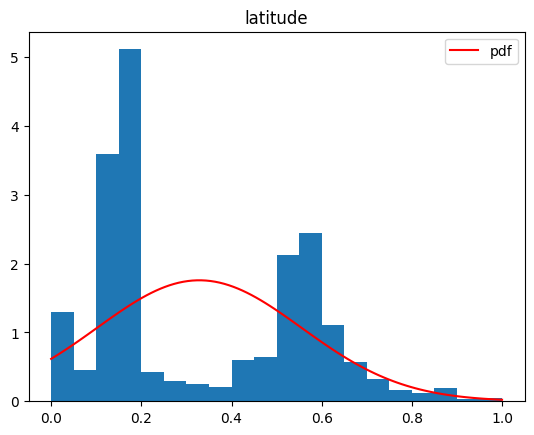

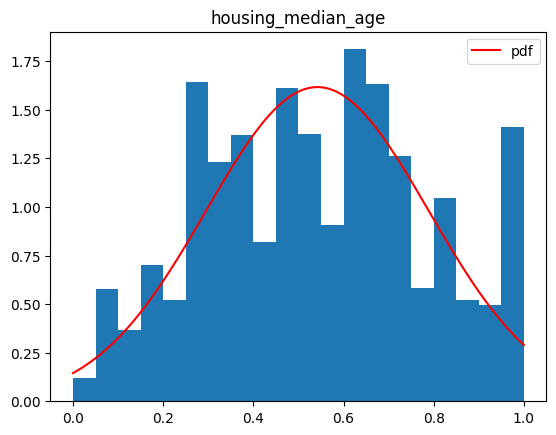

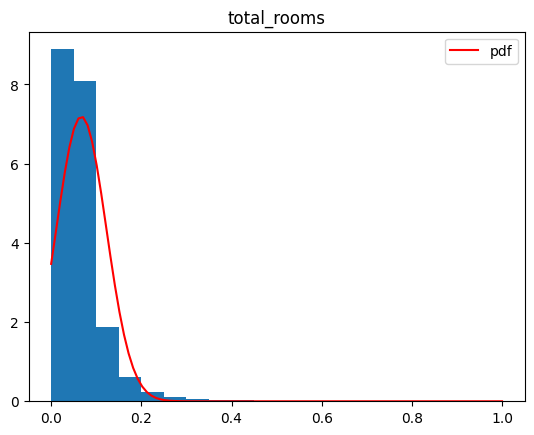

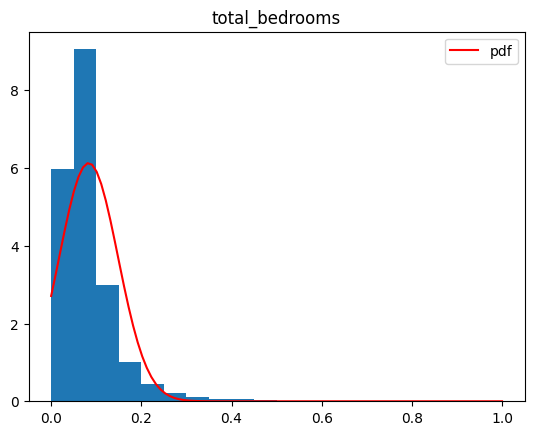

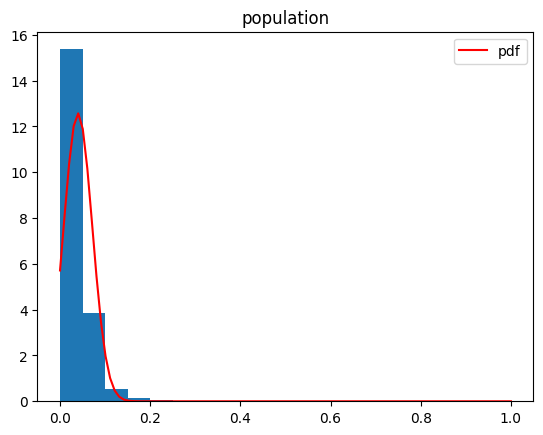

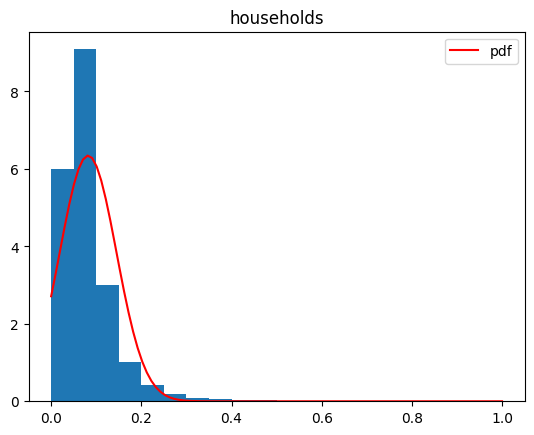

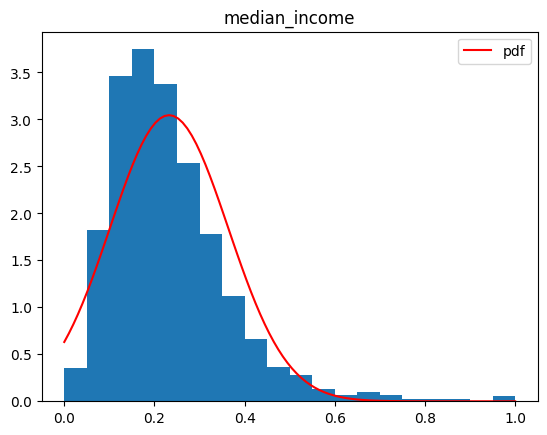

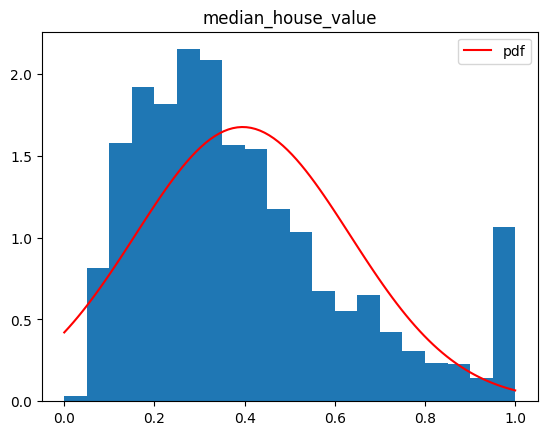

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

def load_data():
    data = pd.read_csv(r'housing.csv')
    numerical_data = data.drop("ocean_proximity", axis=1)
    categorical_data = data["ocean_proximity"]
    return numerical_data, categorical_data.values

def one_hot_encoding(data):
    return OneHotEncoder().fit_transform(data.reshape(-1, 1)).toarray()

def normalize_data(data): # normalize data to range [0, 1]
    return MinMaxScaler((0,1)).fit_transform(data)

def calculate_pdf(data):
    pdf_list = []
    for i in range(data.shape[1]):
        column = data[:, i]
        mean = np.mean(column)
        std = np.std(column)
        pdf = stats.norm.pdf(column, mean, std).mean()
        pdf_list.append(pdf)
    return pdf_list

def plot_pdf_histograms(pdf_list, normalized_numerical_data, numerical_data_columns):
    for i in range(normalized_numerical_data.shape[1]):
        column = normalized_numerical_data[:, i]
        x = np.linspace(column.min(), column.max(), 100)
        y = stats.norm.pdf(x, np.mean(column), np.std(column))
        plt.hist(column, bins=20, density=True)
        plt.plot(x, y, '-r', label='pdf')
        plt.legend()
        plt.title(numerical_data_columns[i])
        plt.show()
        

if __name__ == '__main__':
    numerical_data, categorical_data = load_data()
    numerical_data_columns = numerical_data.columns
    categorical_data_encoded = one_hot_encoding(np.array(list(categorical_data)))
    numerical_data = numerical_data.fillna(numerical_data.median()) # fill missing values with median
    normalized_numerical_data = normalize_data(np.array(numerical_data))
    pdf_list = calculate_pdf(normalized_numerical_data)
    plot_pdf_histograms(pdf_list, normalized_numerical_data, numerical_data_columns)